In [1]:
## Protein family cluster size distribution
# The Clusters file has representative, member in each line (tab-separated)
# The count is the number of times the same reperesntative is listed (in the first column).

In [2]:
import gzip

In [3]:
file = "Clusters.tsv.gz"

In [4]:
counts_list = []
with gzip.open(file,'rt') as fh:
    # Representative in first line
    previous_rep = fh.readline().split('\t')[0]
    # Start count for first rep
    count = 1
    # Loop through rest of lines
    for line in fh:
        rep = line.split('\t')[0]
        if previous_rep == rep:
            count += 1
        else:
            # If rep is different from last line, restart counting and add count to list
            counts_list.append( count )
            count = 1
        previous_rep = rep
# Add the last count
counts_list.append( count )

In [5]:
# Number of lines in Clusters file = 63751597
# Number of clusters = 63,751,597
# Number of reps     = 13,139,838
len(counts_list)

13139838

In [6]:
# Check first few and last few counts (by looking at first few and last few lines of cluster file)
print(counts_list[:4])
print(counts_list[-4:])

[1, 7, 1, 1]
[20, 15, 2, 2]


In [7]:
import matplotlib.pyplot as plt

In [8]:
plt.rcParams.update({'font.size': 14})

In [9]:
# Max of counts list:
max(counts_list)

14604

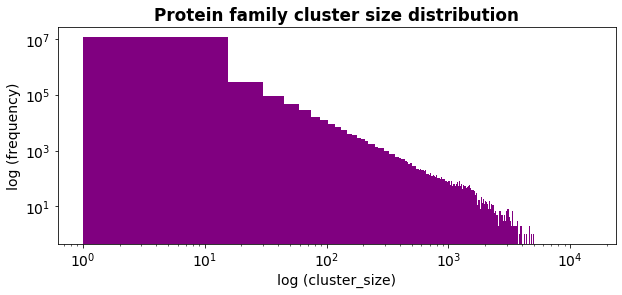

In [12]:
plt.figure(figsize=(10,4))
_ = plt.hist(counts_list, 1000, color='purple')
plt.xscale('log')
plt.yscale('log')
_ = plt.ylabel('log (frequency)')
_ = plt.xlabel('log (cluster_size)')
_ = plt.title('Protein family cluster size distribution',fontweight='bold')
_ = plt.savefig('cluster_sizes.png', bbox_inches='tight', dpi=100)